In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### teste

In [ ]:
games = pd.read_csv('DataCSV/games_limpo.csv', sep=',')
dg_filter = games[["app_id","name","release_date","is_free","type"]]

dspy = pd.read_csv('.\\DataCSV\\steamspy_insights.csv', sep=',')
ds_filter = dspy[["app_id","developer","publisher","languages","genres"]]

reviews = pd.read_csv('DataCSV/review_corrigido.csv', sep=',')
dr_filter = reviews[["app_id","review_score","review_score_description","positive","negative","total","metacritic_score","recommendations"]]

npromotional = pd.read_csv('DataCSV/newpromotional.csv', sep=',')
categories = pd.read_csv('DataCSV/categories.csv', sep=',')
tags = pd.read_csv('.\\DataCSV\\tags.csv', sep=',')

df = pd.merge(dg_filter, ds_filter, on='app_id', how='inner')
df = pd.merge(df, dr_filter, on='app_id', how='inner')
df = pd.merge(df, npromotional, on='app_id', how='inner')
df = pd.merge(df, categories, on='app_id', how='inner')
df = pd.merge(df, tags, on='app_id', how='inner')

df

C:\Users\P. Henrique\AppData\Local\Temp\ipykernel_1928\2418120138.py:7: DtypeWarning: Columns (1,3,4,5,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('DataCSV/review_corrigido.csv', sep=',')


### graphs

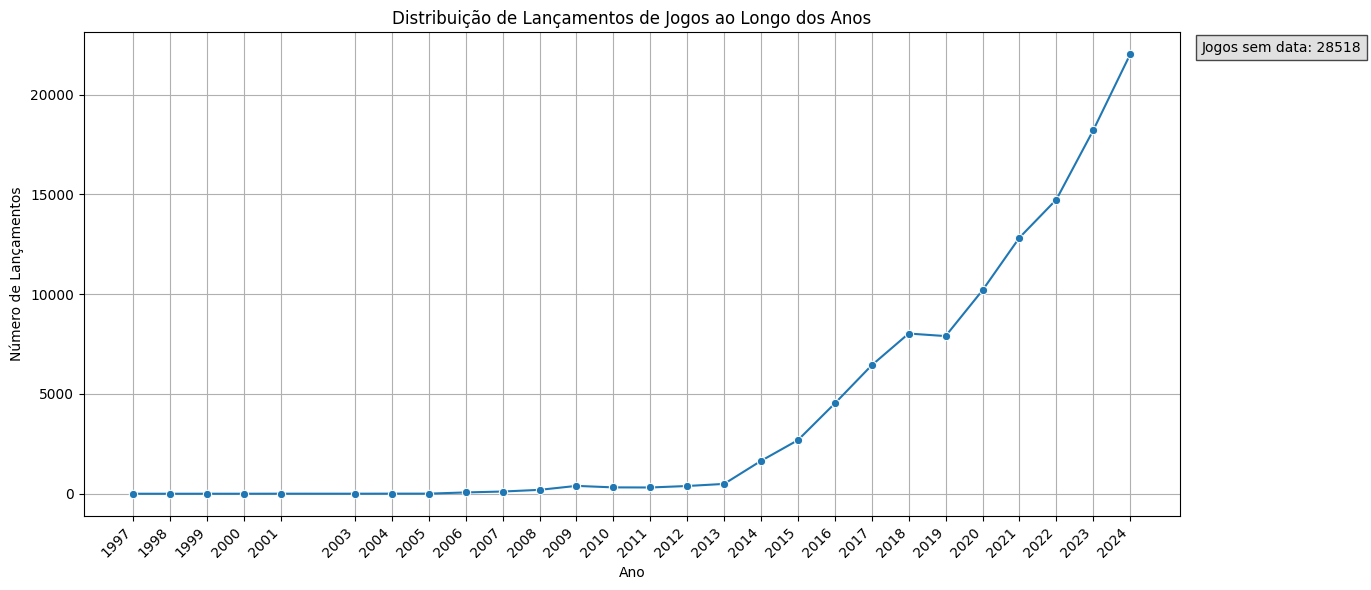


Número de lançamentos por ano (em ordem crescente):
 release_year
1997        2
1998        1
1999        2
2000        2
2001        4
2003        3
2004        6
2005        6
2006       67
2007      112
2008      196
2009      395
2010      320
2011      315
2012      389
2013      494
2014     1649
2015     2688
2016     4529
2017     6442
2018     8029
2019     7902
2020    10197
2021    12833
2022    14742
2023    18217
2024    22022
Name: count, dtype: int64

Número total de jogos sem informação de data de lançamento: 28518

Número total de jogos com data de lançamento no gráfico: 111564


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o DataFrame (use o caminho correto para o seu arquivo)
dgames = pd.read_csv('.\\DataCSV\\games_limpo.csv', sep=',', on_bad_lines="warn")

# Convertendo a coluna 'release_date' para o tipo datetime
dgames['release_date'] = pd.to_datetime(dgames['release_date'], errors='coerce')

# Contando o número de valores NaT (datas inválidas)
null_release_count = dgames['release_date'].isnull().sum()

# Removendo linhas onde a conversão para datetime falhou (datas inválidas)
dgames.dropna(subset=['release_date'], inplace=True)

# Extraindo o ano da data de lançamento
dgames['release_year'] = dgames['release_date'].dt.year

# Contando o número de lançamentos por ano
yearly_releases = dgames['release_year'].value_counts().sort_index()

# Calculando o número total de jogos com data de lançamento
total_games_with_date = yearly_releases.sum()

# Visualizando a distribuição de lançamentos por ano
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o')
plt.title('Distribuição de Lançamentos de Jogos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.grid(True)

# Define os ticks do eixo x para mostrar todos os anos
plt.xticks(yearly_releases.index, rotation=45, ha='right')
plt.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham

# Adicionando uma anotação sobre o número de jogos sem data de lançamento
plt.annotate(f'Jogos sem data: {null_release_count}',
             xy=(1.02, 0.96), # Ajustei um pouco a posição vertical para não sobrepor
             xycoords='axes fraction',
             fontsize=10,
             bbox=dict(facecolor='lightgray', alpha=0.7))

plt.show()

print("\nNúmero de lançamentos por ano (em ordem crescente):\n", yearly_releases)
print(f"\nNúmero total de jogos sem informação de data de lançamento: {null_release_count}")
print(f"\nNúmero total de jogos com data de lançamento no gráfico: {total_games_with_date}")

C:\Users\P. Henrique\AppData\Local\Temp\ipykernel_4020\880866153.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette='viridis')


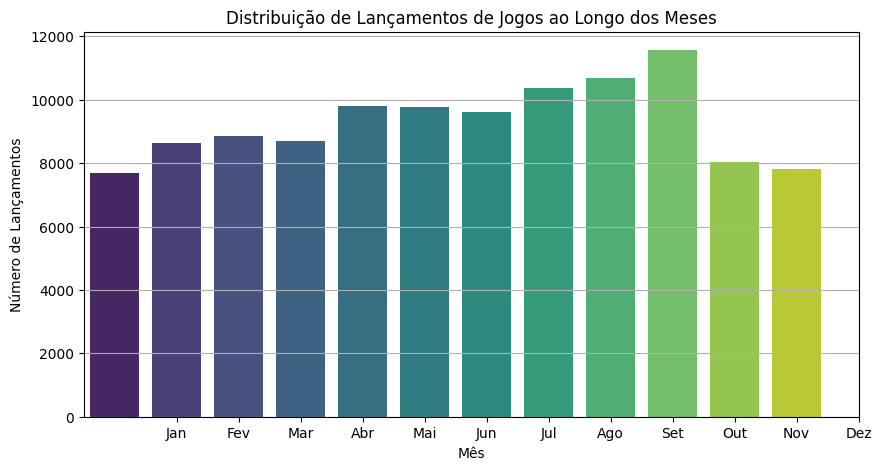


Número de lançamentos por mês (em ordem crescente):
 release_month
1      7682
2      8639
3      8859
4      8686
5      9818
6      9767
7      9610
8     10385
9     10702
10    11568
11     8032
12     7816
Name: count, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o DataFrame (use o caminho correto para o seu arquivo)
dgames = pd.read_csv('.\\DataCSV\\games_limpo.csv', sep=',', on_bad_lines="warn")

# Convertendo a coluna 'release_date' para o tipo datetime
dgames['release_date'] = pd.to_datetime(dgames['release_date'], errors='coerce')

# Removendo linhas onde a conversão para datetime falhou (datas inválidas)
dgames.dropna(subset=['release_date'], inplace=True)

# Extraindo o ano e o mês da data de lançamento
dgames['release_month'] = dgames['release_date'].dt.month

# Contando o número de lançamentos por mês
monthly_releases = dgames['release_month'].value_counts().sort_index()


# Visualizando a distribuição de lançamentos por mês
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette='viridis')
plt.title('Distribuição de Lançamentos de Jogos ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Número de Lançamentos')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y')
plt.show()

print("\nNúmero de lançamentos por mês (em ordem crescente):\n", monthly_releases)

## Pegando os dados do CSV e tratando // (skiprows=1, nrows=1)

### games_limpo.csv (app_id; name; release_date; is_free; type)

In [11]:
games = pd.read_csv('DataCSV/games_limpo.csv', sep=',')

dg_filter = games[["app_id","name","release_date","is_free","type"]]

dg_filter

### steamspy_insights.csv (app_id; developer; publisher; languages; genres)

In [13]:
dspy = pd.read_csv('.\\DataCSV\\steamspy_insights.csv', sep=',',on_bad_lines='warn')

df_filtrado[["app_id","developer","publisher","languages","genres"]]

,app_id,developer,publisher,languages,genres
0,10,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action
1,20,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action
2,30,Valve,Valve,"English, French, German, Italian, Spanish - Spain",Action
3,40,Valve,Valve,"English, French, German, Italian, Spanish - Sp...",Action
4,50,Gearbox Software,Valve,"English, French, German, Korean",Action
...,...,...,...,...,...
139223,3261870,Archor Wright,Archor Games,English,"Action, Indie"
139237,3262200,SeikaGames,SeikaGames,"English, French, Italian, German, Simplified C...","Casual, Indie, Strategy"
139420,3266470,EroticGamesClub,EroticGamesClub,English,"Adventure, Casual, Indie"
139817,3278740,Revolt Games,Strategy First,"English, Russian",Action


### review_corrigido.csv (app_id; review_score; review_score_description; positive; negative; total; metacritic_score; recommendations)

In [8]:
drev = pd.read_csv('.\\DataCSV\\review_corrigido.csv', sep=',')

condicao_total = drev['total'] != 0
df_filtrado = drev[condicao_total]

df_filtrado[["app_id","review_score","review_score_description","positive","negative","total","metacritic_score","recommendations"]]

C:\Users\P. Henrique\AppData\Local\Temp\ipykernel_3960\2341274651.py:1: DtypeWarning: Columns (1,3,4,5,9,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  drev = pd.read_csv('.\\DataCSV\\review_corrigido.csv', sep=',')


,app_id,review_score,review_score_description,positive,negative,total,metacritic_score,recommendations
0,10,9,Overwhelmingly Positive,235403,6207,241610,88,153259
1,20,8,Very Positive,7315,1094,8409,\N,6268
2,30,8,Very Positive,6249,672,6921,79,4146
3,40,8,Very Positive,2542,524,3066,\N,2218
4,50,9,Overwhelmingly Positive,22263,1111,23374,\N,20144
...,...,...,...,...,...,...,...,...
140022,3289180,0,5 user reviews,5,0,5,\N,\N
140031,3289990,0,6 user reviews,6,0,6,\N,\N
140059,3294470,0,1 user reviews,1,0,1,\N,\N
140068,3296020,0,2 user reviews,2,0,2,\N,\N


### newpromotional.csv (app_id; header_image; background_image)

In [4]:
dnpromo = pd.read_csv('.\\DataCSV\\newpromotional.csv', sep=',')

dnpromo

,app_id,header_image,background_image
0,10,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
1,20,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
2,30,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
3,40,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
4,50,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
...,...,...,...
140077,3297700,https://shared.akamai.steamstatic.com/store_it...,\N
140078,3297890,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
140079,3298020,https://shared.akamai.steamstatic.com/store_it...,https://shared.akamai.steamstatic.com/store_it...
140080,3298610,https://shared.akamai.steamstatic.com/store_it...,\N


### tags.csv (app_id; tag)

In [5]:
dtag = pd.read_csv('.\\DataCSV\\tags.csv', sep=',')

dtag

,app_id,tag
0,10,1980s
1,10,1990's
2,10,Action
3,10,Assassin
4,10,Classic
...,...,...
1744627,3298710,Puzzle
1744628,3298710,Relaxing
1744629,3298710,Sexual Content
1744630,3298710,Singleplayer


### categories.csv (app_id; category)

In [9]:
dcate = pd.read_csv('.\\DataCSV\\categories.csv', sep=',')

dcate

,app_id,category
0,10,Family Sharing
1,10,Multi-player
2,10,Online PvP
3,10,PvP
4,10,Shared/Split Screen PvP
...,...,...
522577,3298610,Game demo
522578,3298710,Full controller support
522579,3298710,Single-player
522580,3298710,Steam Achievements


### -- descriptions.csv (app_id; summary; extensive; about) --

In [10]:
ddesc = pd.read_csv('.\\DataCSV\\descriptions.csv', sep=',',on_bad_lines='warn')

desc_filtred=ddesc[ddesc["summary"]!=r"\N"]
desc_filtred

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,app_id,summary,extensive,about
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...
...,...,...,...,...
63071,3286710,Softie is a short creepy (but cute!) point-and...,"<p class=\bb_paragraph\""><img class=\""bb_img\""...","<p class=\bb_paragraph\""><img class=\""bb_img\""..."
63079,3287270,The Demo for Roy Rattler,"<p class=\bb_paragraph\"">The Demo for Roy Ratt...","<p class=\bb_paragraph\"">The Demo for Roy Ratt..."
63084,3287450,本体験版は、神椿市建設中。REGENERATEの一部がプレイ可能です。 製品版とは異なる場合...,"<p class=\bb_paragraph\"">本体験版は、神椿市建設中。REGENERA...","<p class=\bb_paragraph\"">本体験版は、神椿市建設中。REGENERA..."
63091,3288870,Get ready for non-stop action in TAKEDOWN: Las...,"Lock, load, and prepare for the ultimate rush ...","Lock, load, and prepare for the ultimate rush ..."
